In [8]:
import sys
import os
import numpy as np
import pandas as pd

PROJ_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJ_ROOT not in sys.path:
    sys.path.insert(0, PROJ_ROOT)

from src.models.ada_boost import AdaBoostModel
from src.dataset import Dataset
from src.utils import ModelIO

pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)

In [9]:
dataset = Dataset()
f_train, f_test, l_train, l_test = dataset.split_data(target_column = 'LUNG_CANCER')

In [10]:
model = AdaBoostModel(n_estimators = 200)
model.train(f_train, l_train)

In [11]:
print("=============== TRAINING SET ===============")
model.score(f_train, l_train)

=============== TRAINING SET ===============

Confusion Matrix:
Predicted   0    1
Actual            
0          17    9
1           6  188

TN=17, FP=9, FN=6, TP=188

Accuracy : 0.9318
Recall   : 0.9691   (TP/(TP+FN))
Precision: 0.9543   (TP/(TP+FP))
F1-score : 0.9616   (2*P*R/(P+R))
AUC      : 0.9653


In [12]:
print("=============== TESTING SET ===============")
model.score(f_test, l_test)

=============== TESTING SET ===============

Confusion Matrix:
Predicted  0   1
Actual          
0          8   4
1          0  44

TN=8, FP=4, FN=0, TP=44

Accuracy : 0.9286
Recall   : 1.0000   (TP/(TP+FN))
Precision: 0.9167   (TP/(TP+FP))
F1-score : 0.9565   (2*P*R/(P+R))
AUC      : 0.9678


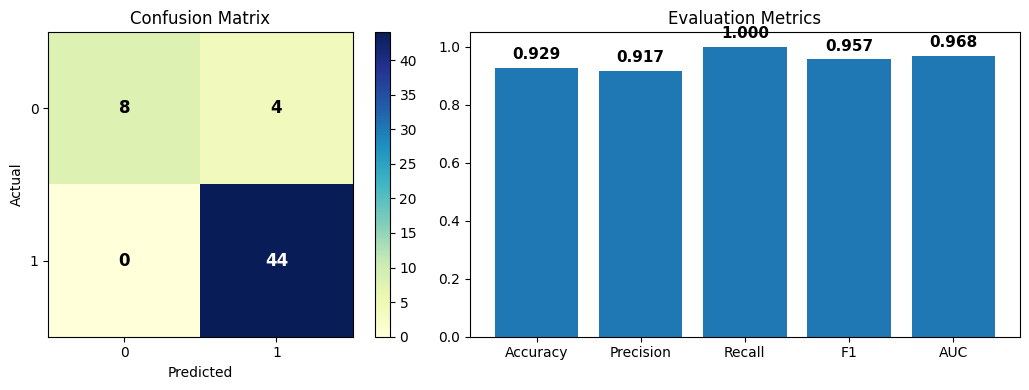

In [13]:
model.plot_evaluation()

In [14]:
ModelIO.save(model, "ada_boost_model.pkl")

Model saved to: lung_cancer_RF/checkpoints/ada_boost_model.pkl


True